In [19]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

%matplotlib inline

###Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

* quadratic (second degree polynomial)
* logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)

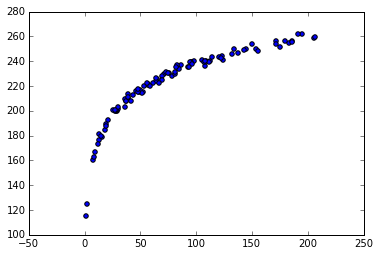

In [33]:
np.random.seed(7)
epsilon = np.random.randn(100)*2
x = abs(np.random.randn(100))*100
y = 100 + 30*np.log(x) + epsilon
plt.scatter(x,y)
plt.show()

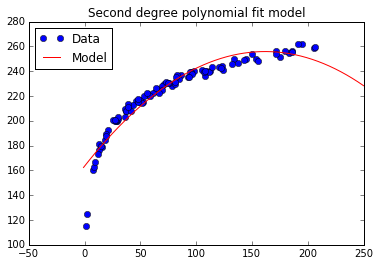

In [34]:
z = np.polyfit(x, y, 2)
f = np.poly1d(z)

x_qmodel = np.linspace(-1, 250)
y_qmodel = f(x_qmodel)

plt.plot(x,y,"o", label = "Data")
plt.plot(x_qmodel, y_qmodel, color = "r", label = "Model")
plt.legend(loc= "best")
plt.title("Second degree polynomial fit model")
plt.show()

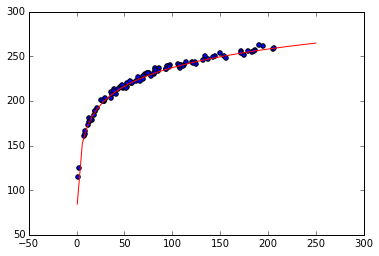

In [45]:
def func(x, a, b, c):
    return a + b*np.log(x)+epsilon[1]

np.random.seed(7)
epsilon = np.random.randn(100)*2
xx = np.linspace(-10, 250)
yy = func(xx, 100, 30, epsilon)

plt.scatter(x, y)
plt.plot(xx, yy,"-",color = "r")
plt.show()

###Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

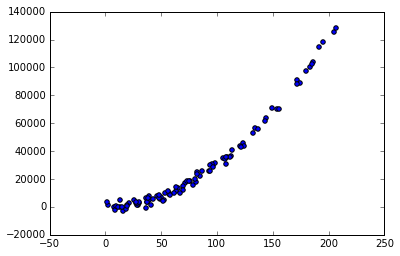

In [46]:
np.random.seed(7)
epsilon2 = np.random.randn(100)*2000
x2 = abs(np.random.randn(100))*100
y2 = 2 + (3*x2) + (3*(x2**2)) + epsilon2
plt.scatter(x2,y2)
plt.show()

In [47]:
x2 = x2.reshape(100,1)
y2 = y2.reshape(100,1)

x_train, x_test, y_train, y_test = train_test_split(
    x2, y2, test_size=0.25, random_state=0)

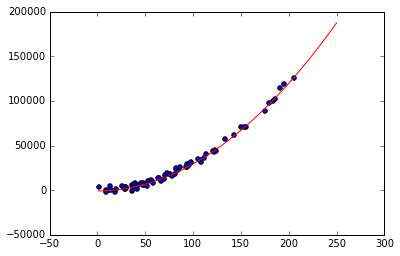

In [54]:
def func(x2, a, b, c, d):
    return a + (b*x2) + (c*(x2**2)) + epsilon2[1]

np.random.seed(7)
xx = np.linspace(1, 250,250)
yy = func(xx, 2, 3, 3, epsilon2)
plt.scatter(x_train, y_train)
plt.plot(xx, yy,"-",color = "r")
plt.show()

In [57]:
y_train_pred = func(x_train,2,3,3,epsilon2)
mean_squared_error(y_train, y_train_pred)

5994668.58479991

In [59]:
y_test_pred = func(x_test,2,3,3,epsilon2)
mean_squared_error(y_test, y_test_pred)

2277065.2034592307

###Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

* training error
* test error
* R squared
* AIC

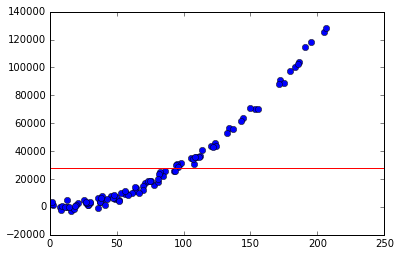

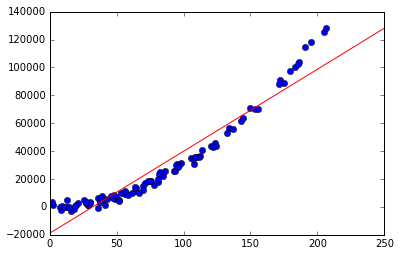

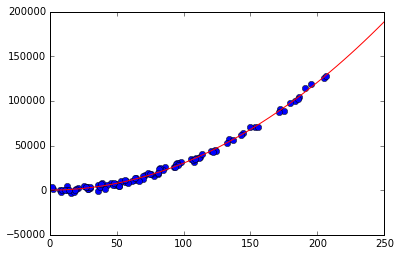

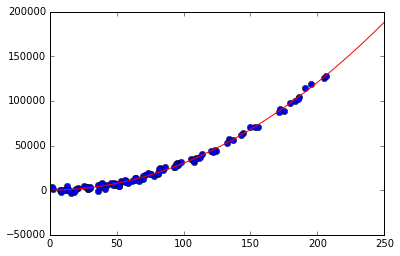

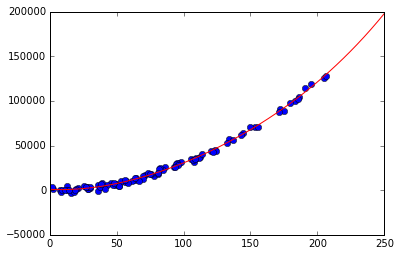

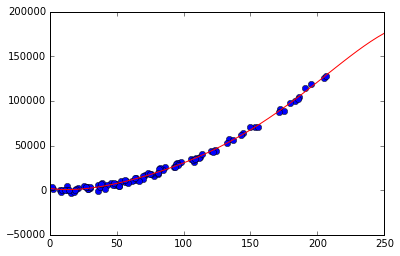

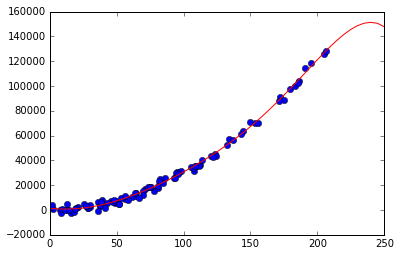

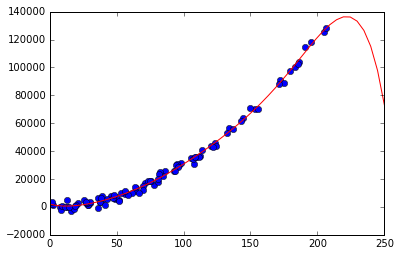

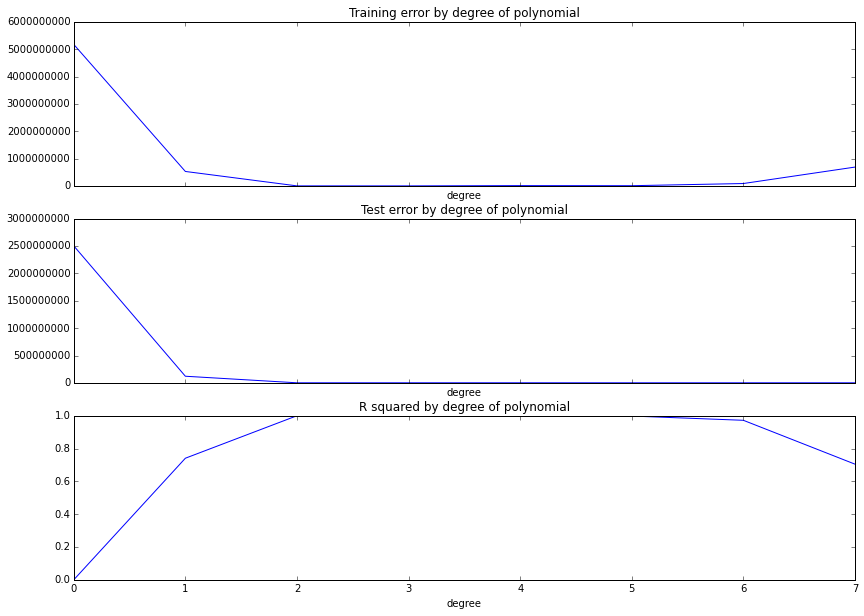

In [60]:
x2 = x2.ravel()
y2 = y2.ravel()

headers = ['degree', 'train_error', 'test_error','r_squared']
data = []

def poly_fits(degree):
    z = np.polyfit(x2, y2, degree)
    f = np.poly1d(z)
    
    np.random.seed(7)
    #x_new = abs(np.random.randn(1000))*100
    x_new = np.linspace(0, 250)
    y_new = f(x_new)

    x_train, x_test, y_train, y_test = train_test_split(
        x_new, y_new, test_size=0.25, random_state=0)

    y_train_pred = func(x_train,2,3,3,1)
    train_mse = mean_squared_error(y_train, y_train_pred)

    y_test_pred = func(x_test,2,3,3,1)
    test_mse = mean_squared_error(y_test, y_test_pred)

    r2 = r2_score(y_train, y_train_pred)
    
    plt.plot(x2,y2,"o")
    plt.plot(x_new, y_new, color = "r")
    plt.show()

    info_dict = dict(zip(headers, [degree, train_mse, test_mse, r2]))
    data.append(info_dict)

for i in range(0,8):
    poly_fits(i)
df = pd.DataFrame(data)

df_train = df[['degree', 'train_error']]
df_test = df[['degree', 'test_error']]
df_r2 = df[['degree', 'r_squared']]

fig, axes = plt.subplots(nrows=3, ncols=1,sharex = True, figsize=(14,10))
axes[0].set_title('Training error by degree of polynomial')
axes[1].set_title('Test error by degree of polynomial')
axes[2].set_title('R squared by degree of polynomial')

axes[0].get_yaxis().get_major_formatter().set_scientific(False)
axes[1].get_yaxis().get_major_formatter().set_scientific(False)
df_train.plot(x = 'degree', y = 'train_error', ax=axes[0], legend = None)
df_test.plot(x = 'degree', y = 'test_error', ax=axes[1], legend = None)
df_r2.plot(x = 'degree', y = 'r_squared', ax=axes[2], legend = None)
plt.show()

###Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

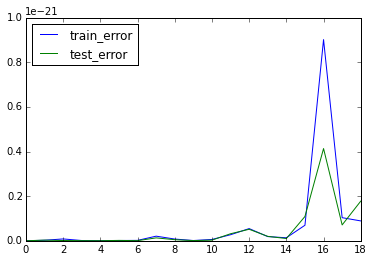

In [78]:
np.random.seed(7)
x2 = abs(np.random.randn(100))*100
y2 = 2 + (3*x2) + (3*(x2**2)) + epsilon2
def func(x2):
    return 2 + (3*x2) + (3*(x2**2)) + epsilon2[0]

headers = ['points', 'train_error', 'test_error']
data = []

def learning_curve(m):
    x2_sorted = np.sort(x2)
    x_new = x2_sorted[0:m]
    y_new = func(x_new)
    
    z = np.polyfit(x_new, y_new, 2)
    f = np.poly1d(z)
    
    x_train, x_test, y_train, y_test = train_test_split(
        x_new, y_new, test_size=0.2, random_state=0)

    y_train_pred = f(x_train)
    train_mse = mean_squared_error(y_train, y_train_pred)

    y_test_pred = f(x_test)
    test_mse = mean_squared_error(y_test, y_test_pred)

    info_dict = dict(zip(headers, [m, train_mse, test_mse]))
    data.append(info_dict)

for i in range(5,100,5):
    learning_curve(i)
df = pd.DataFrame(data)
df = df[['train_error', 'test_error']]

df.plot()
plt.legend(loc='best')
plt.show()